# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [41]:
#Import all the necessary modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
import random

In [42]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#pima_df = pd.read_csv(url, names= colnames)
#pima_df.head(2)

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [43]:
pima_df = pd.read_csv("pima-indians-diabetes.data",names= colnames)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [44]:
pima_df.sample(10) # to randomly sample 10 records

,preg,plas,pres,skin,test,mass,pedi,age,class
353,1,90,62,12,43,27.2,0.580,24,0
383,1,90,62,18,59,25.1,1.268,25,0
740,11,120,80,37,150,42.3,0.785,48,1
171,6,134,70,23,130,35.4,0.542,29,1
540,8,100,74,40,215,39.4,0.661,43,1
452,0,91,68,32,210,39.9,0.381,25,0
485,0,135,68,42,250,42.3,0.365,24,1
398,3,82,70,0,0,21.1,0.389,25,0
700,2,122,76,27,200,35.9,0.483,26,0
378,4,156,75,0,0,48.3,0.238,32,1


In [45]:
pima_df.head(10) # to populate the first 10 samples of the data set

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [46]:
pima_df[~pima_df.applymap(np.isreal).all(1)]
# this function checks if the columns have non numericAL VALUES

,preg,plas,pres,skin,test,mass,pedi,age,class


# Q3 Print the datatypes of each column and the shape of the dataset 

In [47]:
pima_df.shape

(768, 9)

In [48]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [49]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
pima_df[pima_df == 0]
#pima_df.loc[:, (pima_df == 0).all()]

,preg,plas,pres,skin,test,mass,pedi,age,class
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [53]:
pima_df = pima_df.replace(0, pima_df.median())
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [54]:
pima_df.loc[:, pima_df.columns.difference(['class'])].fillna(pima_df.median())
pima_df
# Ignore the target column 'Class' from this replacememt as it is not valid for calculation

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [33]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [34]:
pima_df.groupby(["class"]).count() # To view the distribution of the 'Class' target variable

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


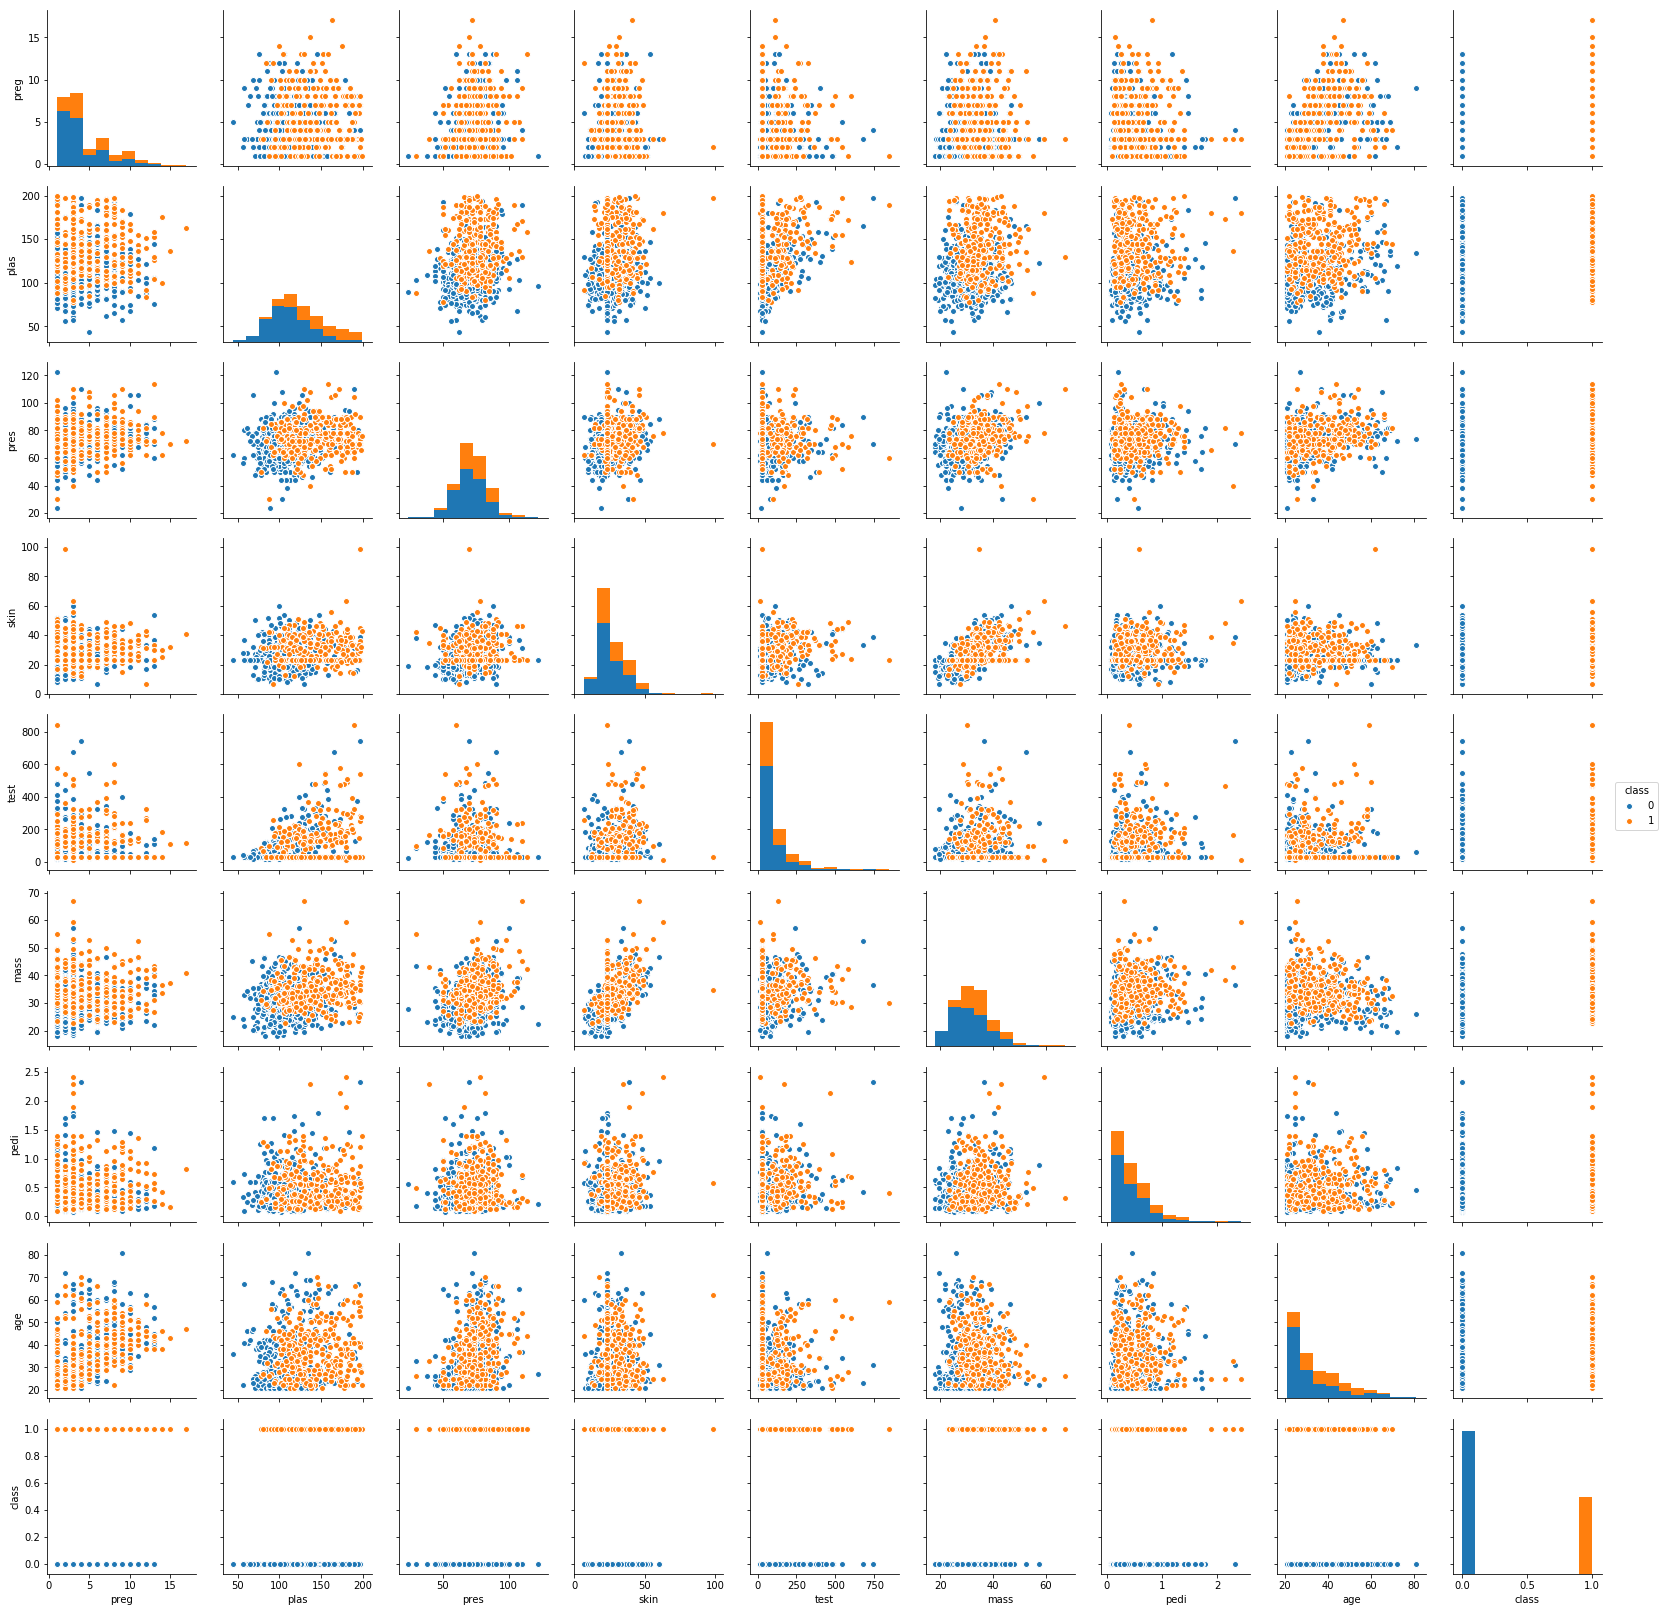

In [55]:
sns.pairplot(pima_df, hue = "class")

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [ ]:
# Attributes which seems to follow a nomal distribution are (plas,pres and mass).
# Some of the attributes look like they  have a skewed distriutin  (skin, testand pedi) probably due to data collection constraints


Using bivariate analysis check for useful relationships between attributes and attributes and the target class



In [ ]:
# There is no obvious relationship between age, pedi, test, skin , preg and onset of diabetes.
# However, there is significant relationship between plas function and onset of diabetes  and to some extent mass when compared to other variables.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


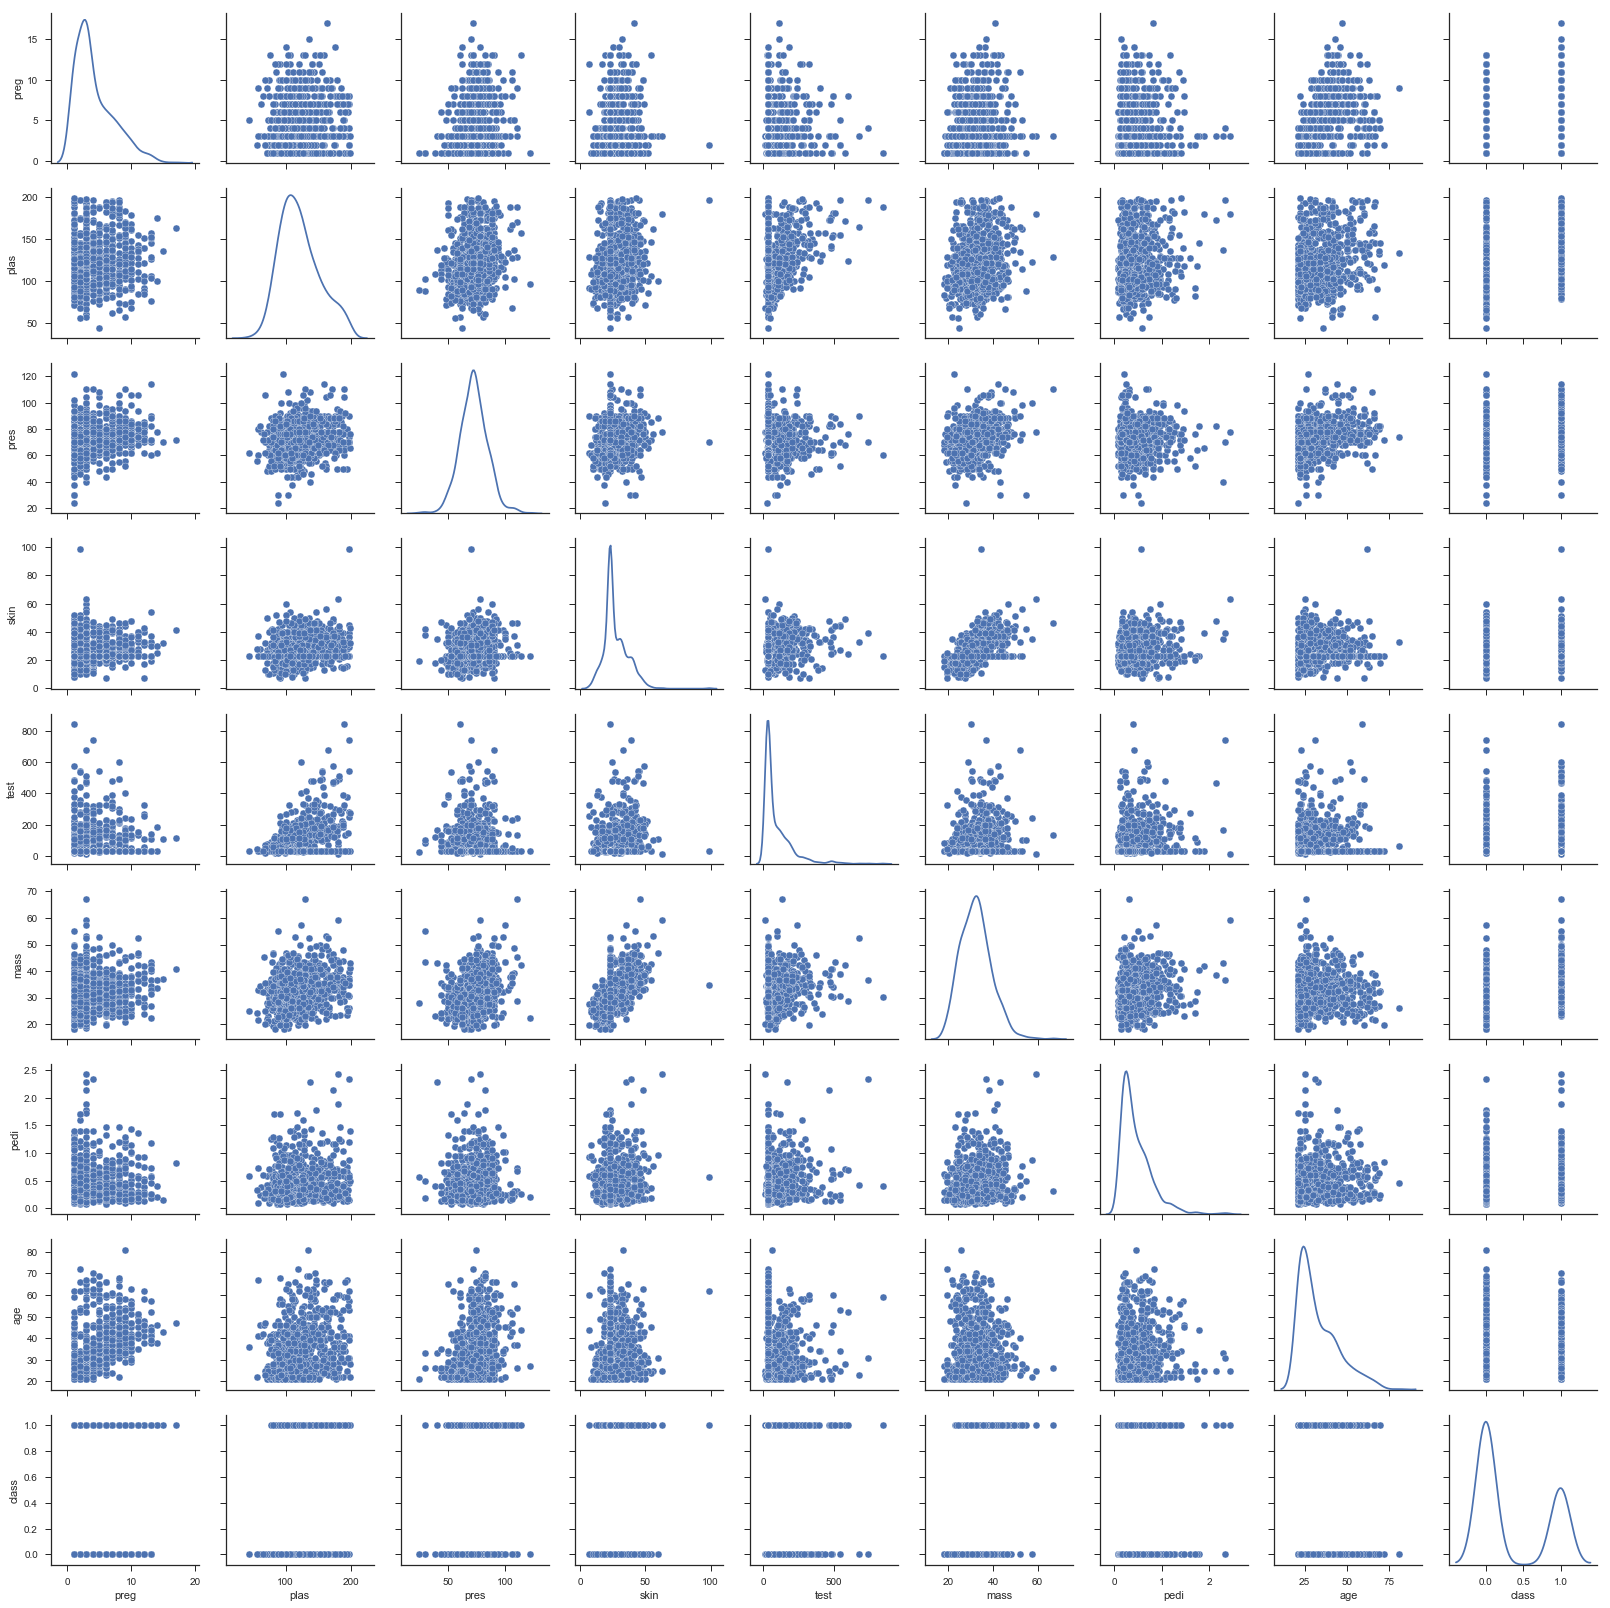

In [58]:
sns.pairplot(pima_df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']],diag_kind = 'kde')

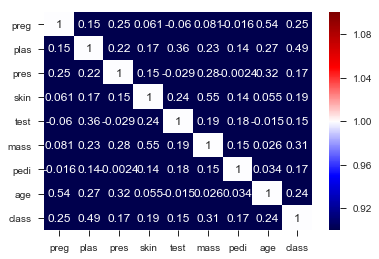

In [76]:
sns.heatmap(pima_df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']].corr(),annot =True,vmin =1,vmax =1,cmap = 'seismic')

Using the plot - infer the relationship between different variables

In [ ]:
#Using the above heatmap and plot,
# Preg and Skin  are significantly correlated with Age.
# Skin and mass are also significantly corellated.
#Pres and Age seems to have a slight significant correlation.
# Other combinations of variables does not seem to have such significant corellations.


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [59]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [60]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [61]:
print(dt_model.score(X_test , y_test))
print(dt_model.score(X_train , y_train))
# Since the training data is 100% accurate and not the test data, this is a clea case of Overfit moel

0.658008658008658
1.0


In [62]:
y_predict = dt_model.predict(X_test)

In [63]:
print(metrics.confusion_matrix(y_test, y_predict)) # prints the confusion matrix

[[106  41]
 [ 38  46]]


Print the feature importance of the decision model - Optional

In [79]:
clf= DecisionTreeClassifier().fit(X,Y)
clf.feature_importances_

array([0.08982443, 0.33864468, 0.083785  , 0.05995925, 0.07690483,
       0.22433719, 0.12654462])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [68]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7402597402597403
[[125  22]
 [ 38  46]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [69]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [70]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7229437229437229
[[116  31]
 [ 33  51]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [71]:
from sklearn.ensemble import BaggingClassifier
# by default the algorithm it takes is Decision tree if not specified
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50) # base estimator is the first instance

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [72]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7272727272727273
[[121  26]
 [ 37  47]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [74]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7532467532467533
[[123  24]
 [ 33  51]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.